In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy import integrate

In [2]:
cryst_sizes = np.linspace(50e-6, 500e-3, 1000)
cryst_nums = (cryst_sizes - 50e-6) * (-1800) + 1e3

In [3]:
cryst_nums

array([1000.        ,  999.09918919,  998.19837838,  997.29756757,
        996.39675676,  995.49594595,  994.59513514,  993.69432432,
        992.79351351,  991.8927027 ,  990.99189189,  990.09108108,
        989.19027027,  988.28945946,  987.38864865,  986.48783784,
        985.58702703,  984.68621622,  983.78540541,  982.88459459,
        981.98378378,  981.08297297,  980.18216216,  979.28135135,
        978.38054054,  977.47972973,  976.57891892,  975.67810811,
        974.7772973 ,  973.87648649,  972.97567568,  972.07486486,
        971.17405405,  970.27324324,  969.37243243,  968.47162162,
        967.57081081,  966.67      ,  965.76918919,  964.86837838,
        963.96756757,  963.06675676,  962.16594595,  961.26513514,
        960.36432432,  959.46351351,  958.5627027 ,  957.66189189,
        956.76108108,  955.86027027,  954.95945946,  954.05864865,
        953.15783784,  952.25702703,  951.35621622,  950.45540541,
        949.55459459,  948.65378378,  947.75297297,  946.85216

In [4]:
crystal_dist = pd.DataFrame((cryst_sizes, cryst_nums)).T
crystal_dist

,0,1
0,0.000050,1000.000000
1,0.000550,999.099189
2,0.001051,998.198378
3,0.001551,997.297568
4,0.002052,996.396757
...,...,...
995,0.497998,103.693243
996,0.498499,102.792432
997,0.498999,101.891622
998,0.499500,100.990811


In [5]:
crystal_dist.columns = ('Size', 'Number')
crystal_dist

,Size,Number
0,0.000050,1000.000000
1,0.000550,999.099189
2,0.001051,998.198378
3,0.001551,997.297568
4,0.002052,996.396757
...,...,...
995,0.497998,103.693243
996,0.498499,102.792432
997,0.498999,101.891622
998,0.499500,100.990811


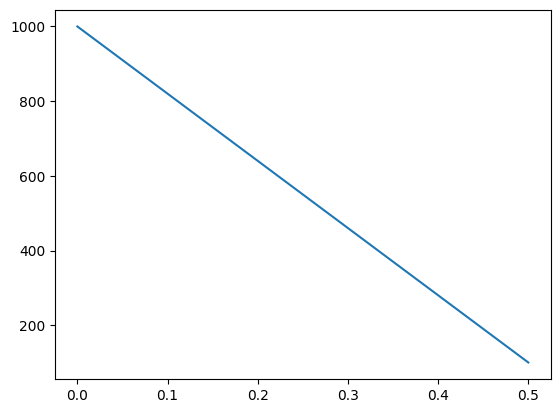

In [6]:
plt.plot(crystal_dist['Size'], crystal_dist['Number'])

In [7]:
cryst_dist_dens = crystal_dist.copy()
cryst_dist_dens['Number'] = cryst_dist_dens['Number'] / np.sum(cryst_dist_dens['Number'])
cryst_dist_dens.columns = ['Size', 'Frac']
cryst_dist_dens

,Size,Frac
0,0.000050,0.001818
1,0.000550,0.001816
2,0.001051,0.001815
3,0.001551,0.001813
4,0.002052,0.001811
...,...,...
995,0.497998,0.000189
996,0.498499,0.000187
997,0.498999,0.000185
998,0.499500,0.000184


In [8]:
# Stała agregacji
k_a = 2.3
g = 2.0
# Stopień przesycenia roztworu
lambda_s = 4

def beta_kernel(sz_1, sz_2=30e-9):
    return k_a * (lambda_s - 1) ** g * (sz_2 + sz_1)

beta_kernel((490e-3**3 - 100e-3**3)**(1/3), 100e-3)

12.184180164430535

In [1]:
f = interp1d(crystal_dist['Size'], crystal_dist['Number'], fill_value="extrapolate")


NameError: name 'interp1d' is not defined

In [23]:
final_size = 60e-9
def integrand(final_size, x=30e-9, n_L=100) :
    a = final_size / 2 * beta_kernel((final_size**3 - x**3)**(1/3), x) * f(final_size - x) * f(x)
    b = n_L * beta_kernel(final_size, x) * f(x)
    return a - b

integrate.quad(integrand, 0, final_size, args=[1])

C:\Users\Nik0\AppData\Local\Temp\ipykernel_14768\829243959.py:5: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integrate.quad(integrand, 30e-9, final_size)


(1.3043993632181582e+31, 7.477357012549653e+26)

In [24]:
init_size = crystal_dist['Size']
integrals = np.array([])
for size in init_size:
    a = integrate.quad(integrand, size, final_size)
    integrals = np.append(integrals, a[0])

integrals

C:\Users\Nik0\AppData\Local\Temp\ipykernel_14768\3275709335.py:4: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  a = integrate.quad(integrand, size, final_size)
C:\Users\Nik0\AppData\Local\Temp\ipykernel_14768\3275709335.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  a = integrate.quad(integrand, size, final_size)
c:\Users\Nik0\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\integrate\_quadpack_py.py:575: ComplexWarning: Casting complex value

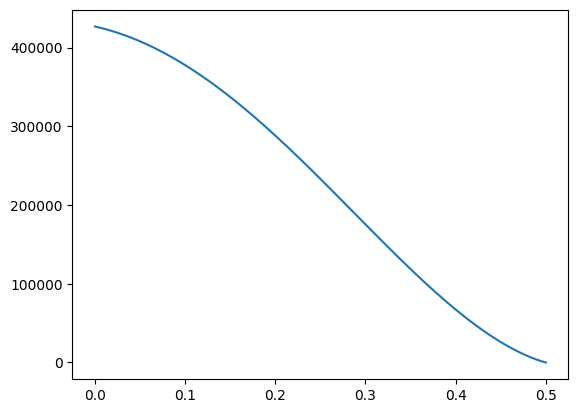

In [29]:
plt.figure()
plt.plot(init_size, integrals)

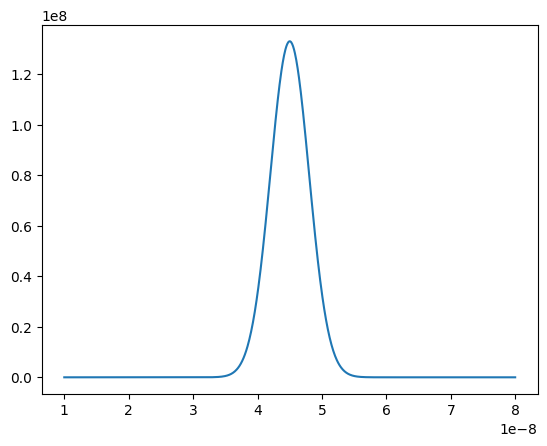

In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
norm_f = lambda x: 1 / 2 / math.sqrt(2 * math.pi) * np.exp(-(x - 10) ** 2 / 2 / 4)
x = np.linspace(10e-9, 80e-9, 1000)
# y = norm_f(x)
y = norm.pdf(x, 45e-9, 3e-9)
plt.plot(x, y)

# z = norm.pdf()

In [19]:
cryst_sizes = np.linspace(10e-9, 80e-9, 1000)
cryst_nums = 6.02e23 * norm.pdf(x, 45e-9, 3e-9)
crystal_dist = pd.DataFrame((cryst_sizes, cryst_nums)).T
crystal_dist.columns = ['Size', 'Number']
crystal_dist

,Size,Number
0,1.000000e-08,222.450334
1,1.007007e-08,292.050230
2,1.014014e-08,383.217312
3,1.021021e-08,502.569079
4,1.028028e-08,658.733101
...,...,...
995,7.971972e-08,658.733101
996,7.978979e-08,502.569079
997,7.985986e-08,383.217312
998,7.992993e-08,292.050230


In [16]:
cryst_sizes.T

array([1.00000000e-08, 1.00700701e-08, 1.01401401e-08, 1.02102102e-08,
       1.02802803e-08, 1.03503504e-08, 1.04204204e-08, 1.04904905e-08,
       1.05605606e-08, 1.06306306e-08, 1.07007007e-08, 1.07707708e-08,
       1.08408408e-08, 1.09109109e-08, 1.09809810e-08, 1.10510511e-08,
       1.11211211e-08, 1.11911912e-08, 1.12612613e-08, 1.13313313e-08,
       1.14014014e-08, 1.14714715e-08, 1.15415415e-08, 1.16116116e-08,
       1.16816817e-08, 1.17517518e-08, 1.18218218e-08, 1.18918919e-08,
       1.19619620e-08, 1.20320320e-08, 1.21021021e-08, 1.21721722e-08,
       1.22422422e-08, 1.23123123e-08, 1.23823824e-08, 1.24524525e-08,
       1.25225225e-08, 1.25925926e-08, 1.26626627e-08, 1.27327327e-08,
       1.28028028e-08, 1.28728729e-08, 1.29429429e-08, 1.30130130e-08,
       1.30830831e-08, 1.31531532e-08, 1.32232232e-08, 1.32932933e-08,
       1.33633634e-08, 1.34334334e-08, 1.35035035e-08, 1.35735736e-08,
       1.36436436e-08, 1.37137137e-08, 1.37837838e-08, 1.38538539e-08,
      